# MultiState Charts



In [1]:
import pandas as pd
import numpy as np
import pandas_gbq
import geopandas as gdp
from plotnine import *
from mizani.formatters import percent_format, currency_format

import statsmodels.api as sm


## Blue Logo


In [2]:
logo_file = '/Users/sarah/Documents/GitHub/TCC/team-set-up/all blue logo-03-small.png'


## MultiState Data

In [3]:
df = pd.DataFrame({'State':['Maryland', 'Colorado', 'New York', 'California', 'Massachusetts'],
                   'preregistration_rates':[.334, .458, .205, .129, .386],
                   'as_of_dates':["Dec 2023", "Sept 2023", "May 2024", "Oct 2023", "May 2024"],
                   })
df

,State,preregistration_rates,as_of_dates
0,Maryland,0.334,Dec 2023
1,Colorado,0.458,Sept 2023
2,New York,0.205,May 2024
3,California,0.129,Oct 2023
4,Massachusetts,0.386,May 2024


## Settings


In [4]:
bgcolor = '#f1f7ff'
textcolor = '#170c66'
linecolor = '#D5D5D5'
highlightcolor = '#ffe047'

### Bar Chart 

In [15]:
df_chart = df.copy()
df_chart['data_label'] = round(df_chart['preregistration_rates'] *100,0).astype(int).astype(str) + "%"
df_chart['x_label'] = df_chart.State + "\n(" + df_chart.as_of_dates +")"
df_chart

,State,preregistration_rates,as_of_dates,data_label,x_label
0,Maryland,0.334,Dec 2023,33%,Maryland\n(Dec 2023)
1,Colorado,0.458,Sept 2023,46%,Colorado\n(Sept 2023)
2,New York,0.205,May 2024,20%,New York\n(May 2024)
3,California,0.129,Oct 2023,13%,California\n(Oct 2023)
4,Massachusetts,0.386,May 2024,39%,Massachusetts\n(May 2024)


In [16]:
state_list = df_chart.sort_values('preregistration_rates', ascending=False).x_label.tolist()

state_cat = pd.Categorical(df_chart["x_label"], categories=state_list)

df_chart = df_chart.assign(x_label=state_cat)

df_chart['color_highlight'] = np.where(df_chart.State=='Massachusetts','1','0')
df_chart['text_color'] = np.where(df_chart.State=='Massachusetts','1','0')


sources ='US Census, Colorado Secretary of State, Massachusetts Secretary of State, Maryland Secretary of State,\nNew York voter file, California Secretary of State'

title: Multi-State Preregistration Rates 2023 and 2024


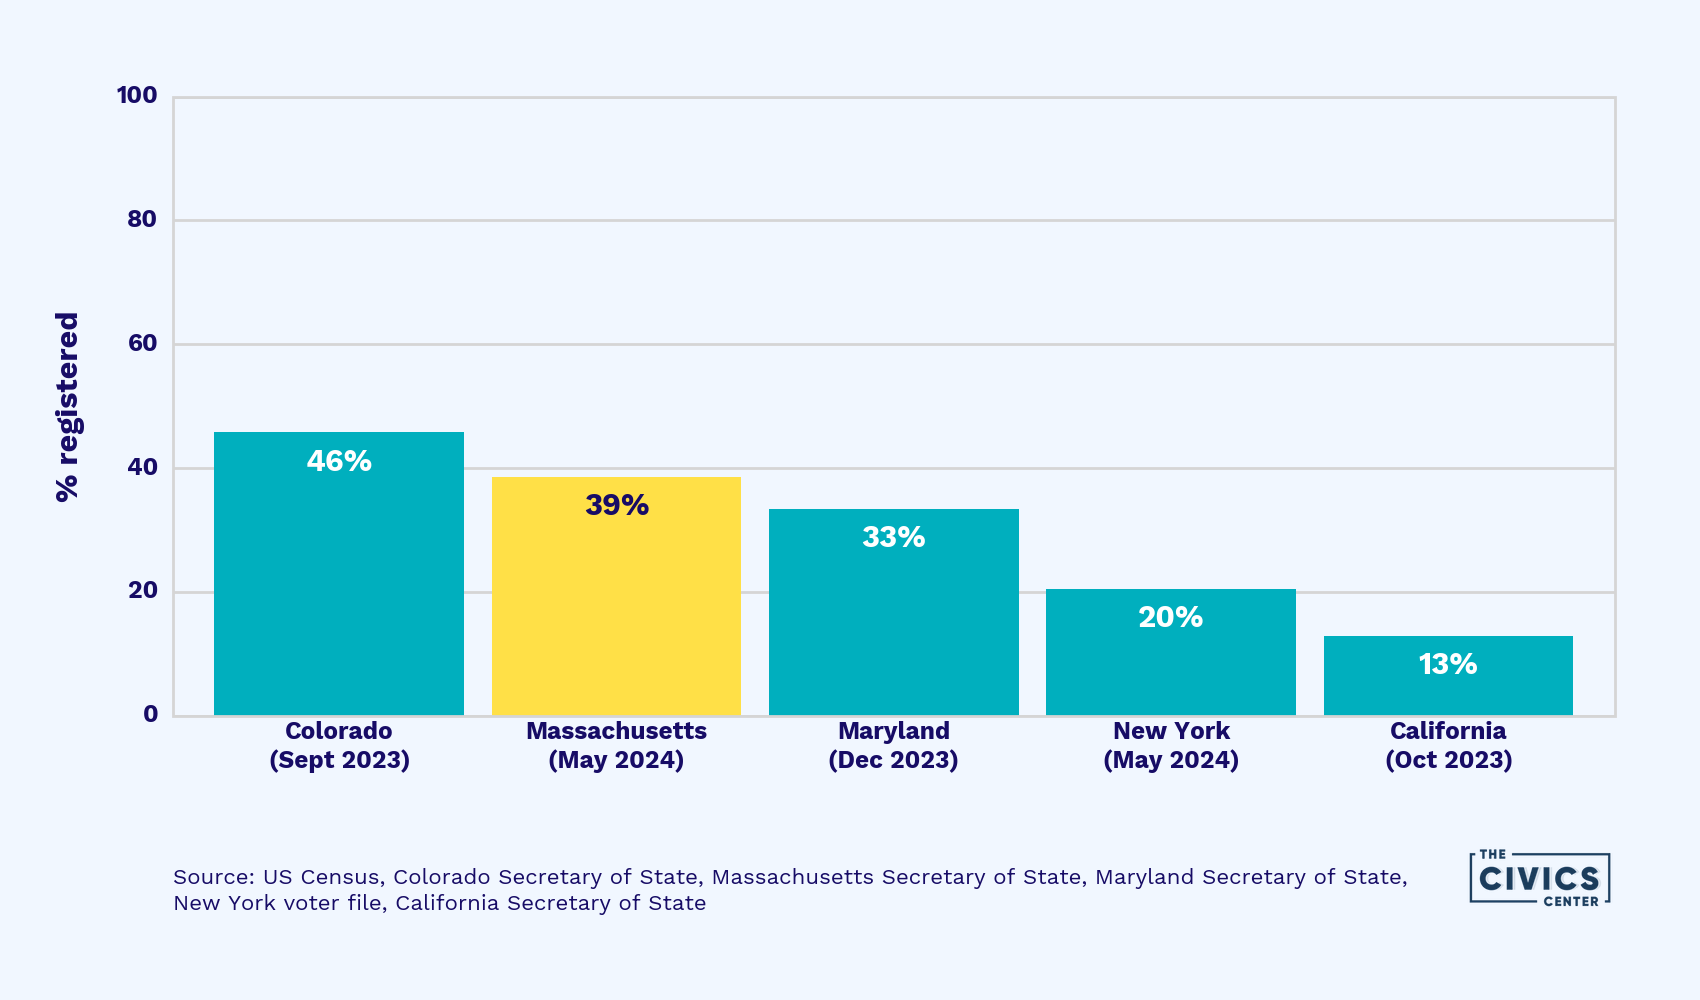

In [17]:
print("title: Multi-State Preregistration Rates 2023 and 2024")
(
    ggplot(df_chart, aes(x='x_label', y='preregistration_rates', label='data_label', fill='color_highlight'))
    + geom_bar(stat='identity', show_legend=False)
    + scale_fill_manual(['#00afbe', highlightcolor])
    + geom_text(aes(color='text_color'), position=position_nudge(x=0, y=-.05),fontweight='bold', show_legend=False)
    + scale_color_manual(['white', textcolor])
    + scale_y_continuous(labels=percent_format(suffix=""), limits=[0,1], breaks=[0,.20,.40,.60,.80,1], expand=(0, 0.0))
    + labs (x="", y = "% registered", title ='', caption="Source: " + sources)
    + theme(text=element_text(family="Work Sans", face='bold', color=textcolor), 
            # axis_title=element_text(face='bold'),
            axis_ticks=element_blank(),
            panel_background=element_rect(fill=bgcolor),
            panel_border=element_rect(fill="none", color=linecolor, size=1),
            panel_grid_major_y=element_line(color="#D5D5D5"),
            panel_grid_minor_y=element_blank(),
            panel_grid_major_x=element_blank(),
            panel_grid_minor_x=element_blank(),
            plot_background=element_rect(fill=bgcolor, color=bgcolor, size=1),
            strip_background=element_rect(size=2),
            axis_text_x=element_text(ha='center', va='center', color=textcolor, y = -0.05, linespacing=1.3), 
            axis_text_y=element_text(ha='right', va='center', color=textcolor, x = -0.01),
            axis_title_y=element_text(ha='right', va='center', color=textcolor, x = -0.01),
            plot_margin_left=.05,
            plot_margin_right=.05,
            plot_margin_top=.05,
            plot_margin_bottom=.05,
            plot_title=element_text(hjust=0, vjust=.8),
            plot_subtitle=element_text(vjust=.8),
            plot_caption=element_text(weight='normal', hjust=0,
                                      size=8,
                                      linespacing=1.3,
                                      margin= {'t':.5, 'b':0, 'l':0, 'r':0, 'units':'inches'}),
            figure_size=(8.5, 5)
            )
    + watermark(logo_file, xo=1465, yo=90 )
)



## Multi-City Data

In [22]:
df = pd.DataFrame({'City':['Baltimore', 'Denver', 'New York City', 'Los Angeles', 'San Francisco', 'San Diego', 'Boston'],
                   'preregistration_rates':[.192, .394, .078, .114, .199, .150, .257],
                   'as_of_dates':["Dec 2023", "Sept 2023", "May 2024", "Oct 2023", "Oct 2023", "Oct 2023", "May 2024"],
                   })
df

,City,preregistration_rates,as_of_dates
0,Baltimore,0.192,Dec 2023
1,Denver,0.394,Sept 2023
2,New York City,0.078,May 2024
3,Los Angeles,0.114,Oct 2023
4,San Francisco,0.199,Oct 2023
5,San Diego,0.150,Oct 2023
6,Boston,0.257,May 2024


## Settings


In [23]:
bgcolor = '#f1f7ff'
textcolor = '#170c66'
linecolor = '#D5D5D5'
highlightcolor = '#ffe047'

### Bar Chart 

In [24]:
df_chart = df.copy()
df_chart['data_label'] = round(df_chart['preregistration_rates'] *100,0).astype(int).astype(str) + "%"
df_chart['x_label'] = df_chart.City + "\n(" + df_chart.as_of_dates +")"
df_chart

,City,preregistration_rates,as_of_dates,data_label,x_label
0,Baltimore,0.192,Dec 2023,19%,Baltimore\n(Dec 2023)
1,Denver,0.394,Sept 2023,39%,Denver\n(Sept 2023)
2,New York City,0.078,May 2024,8%,New York City\n(May 2024)
3,Los Angeles,0.114,Oct 2023,11%,Los Angeles\n(Oct 2023)
4,San Francisco,0.199,Oct 2023,20%,San Francisco\n(Oct 2023)
5,San Diego,0.150,Oct 2023,15%,San Diego\n(Oct 2023)
6,Boston,0.257,May 2024,26%,Boston\n(May 2024)


In [25]:
state_list = df_chart.sort_values('preregistration_rates', ascending=False).x_label.tolist()

state_cat = pd.Categorical(df_chart["x_label"], categories=state_list)

df_chart = df_chart.assign(x_label=state_cat)

df_chart['color_highlight'] = np.where(df_chart.City.isin(['Boston']),'1','0')
df_chart['text_color'] = np.where(df_chart.City.isin(['Boston']),'1','0')


sources ='US Census, Colorado Secretary of State, Massachusetts Secretary of State, Maryland Secretary of State,\nNew York voter file, California Secretary of State'

title: Multi-City Preregistration Rates 2023 and 2024


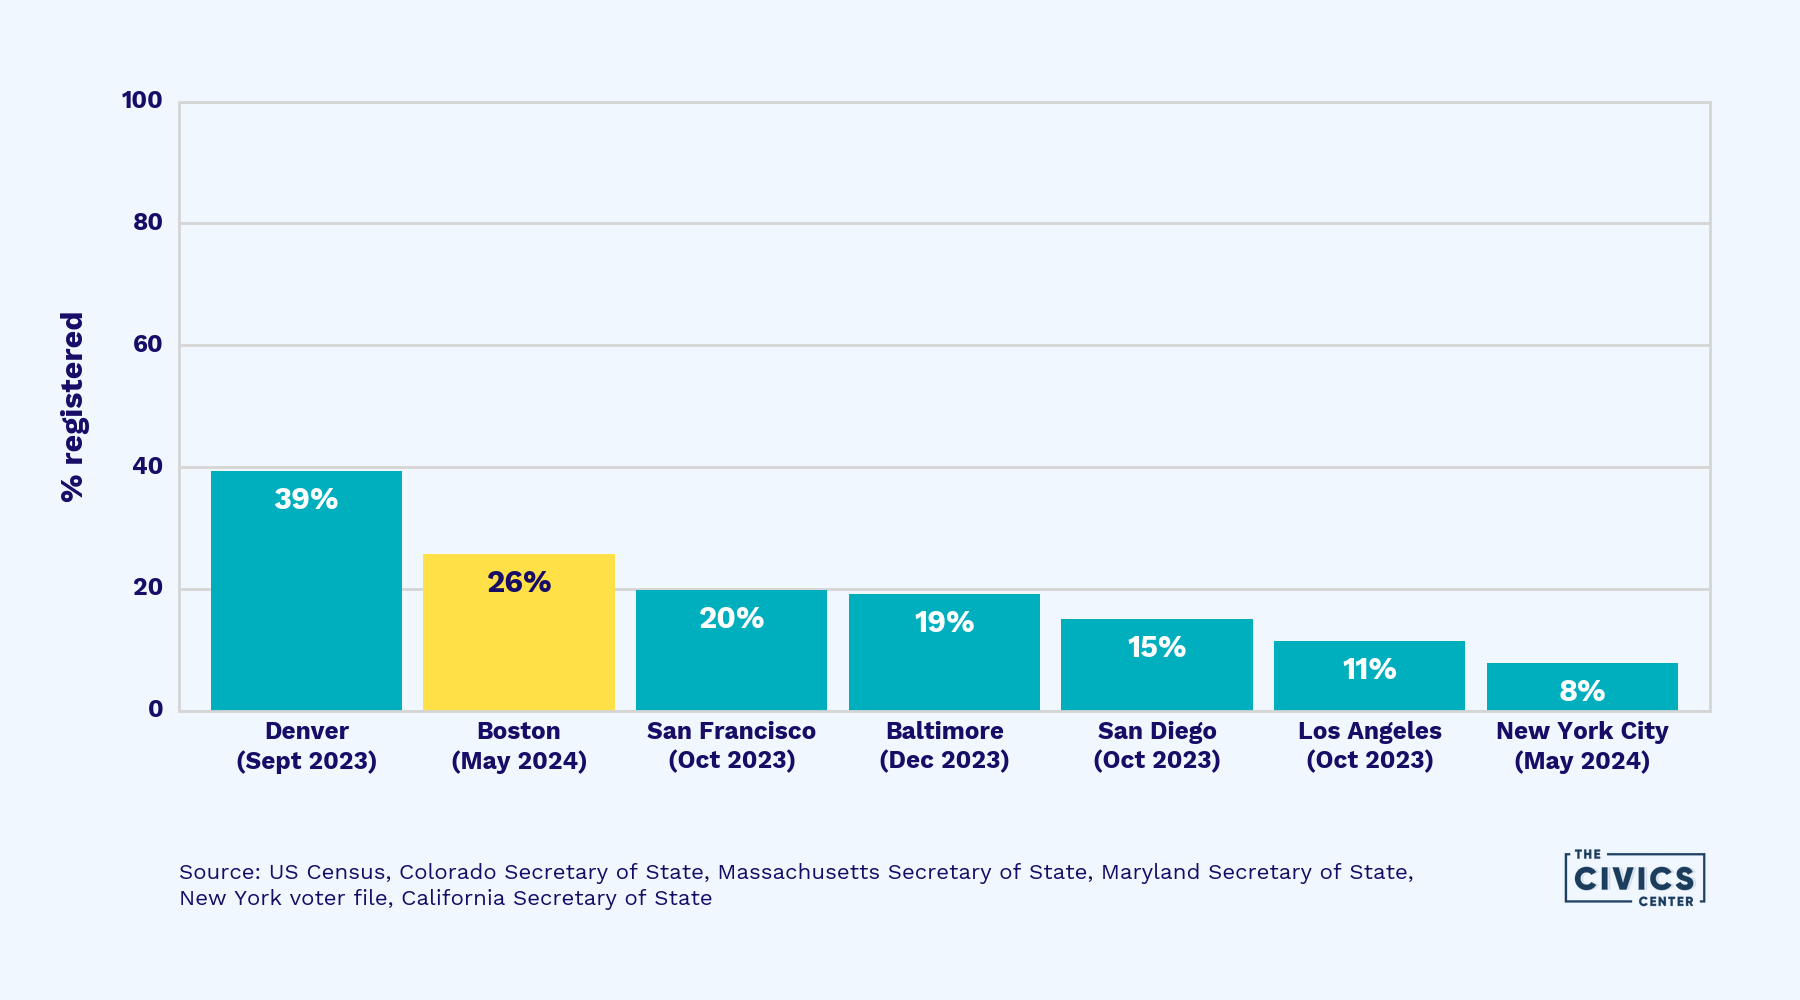

In [26]:
print("title: Multi-City Preregistration Rates 2023 and 2024")
(
    ggplot(df_chart, aes(x='x_label', y='preregistration_rates', label='data_label', fill='color_highlight'))
    + geom_bar(stat='identity', show_legend=False)
    + scale_fill_manual(['#00afbe', highlightcolor])
    + geom_text(aes(color='text_color'), position=position_nudge(x=0, y=-.05),fontweight='bold', show_legend=False)
    + scale_color_manual(['white', textcolor])
    + scale_y_continuous(labels=percent_format(suffix=""), limits=[0,1], breaks=[0,.20,.40,.60,.80,1], expand=(0, 0.0))
    + labs (x="", y = "% registered", title ='', caption="Source: " + sources)
    + theme(text=element_text(family="Work Sans", face='bold', color=textcolor), 
            # axis_title=element_text(face='bold'),
            axis_ticks=element_blank(),
            panel_background=element_rect(fill=bgcolor),
            panel_border=element_rect(fill="none", color=linecolor, size=1),
            panel_grid_major_y=element_line(color="#D5D5D5"),
            panel_grid_minor_y=element_blank(),
            panel_grid_major_x=element_blank(),
            panel_grid_minor_x=element_blank(),
            plot_background=element_rect(fill=bgcolor, color=bgcolor, size=1),
            strip_background=element_rect(size=2),
            axis_text_x=element_text(ha='center', va='center', color=textcolor, y = -0.06, linespacing=1.3), 
            axis_text_y=element_text(ha='right', va='center', color=textcolor, x = -0.01),
            axis_title_y=element_text(ha='right', va='center', color=textcolor, x = -0.01),
            plot_margin_left=.05,
            plot_margin_right=.05,
            plot_margin_top=.05,
            plot_margin_bottom=.05,
            plot_title=element_text(hjust=0, vjust=.8),
            plot_subtitle=element_text(vjust=.8),
            plot_caption=element_text(weight='normal', hjust=0,
                                      size=8,
                                      linespacing=1.3,
                                      margin= {'t':.5, 'b':0, 'l':0, 'r':0, 'units':'inches'}),
            figure_size=(9, 5)
            )
    + watermark(logo_file, xo=1560, yo=90 )
)

